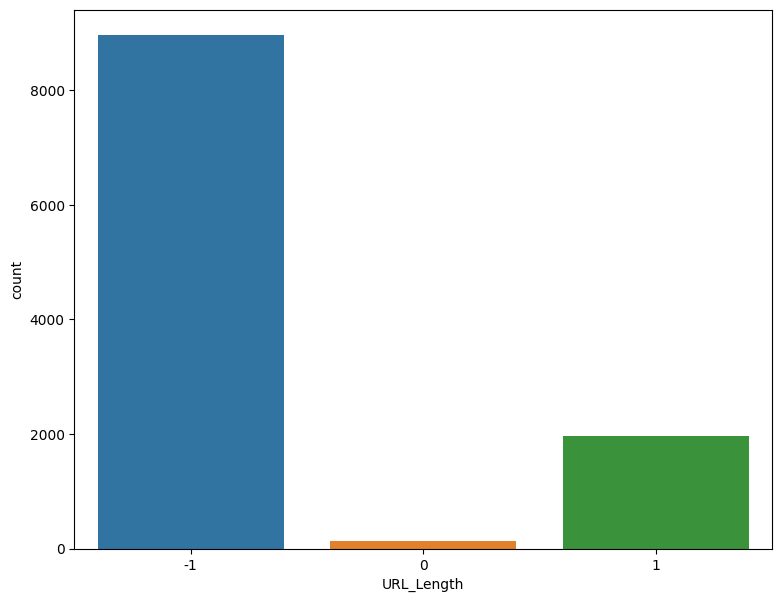

In [95]:

#phishing detection
import numpy as np 
import pandas as pd 

import matplotlib.pyplot as plt 
import seaborn as sns

df= pd.read_csv('/kaggle/input/phishing-dataset-uci-ml-csv/uci-ml-phishing-dataset.csv')
plt.figure(figsize=(9,7))
sns.countplot(x='URL_Length',data=df)
plt.show()


 

**From the above countplot it can be inferred that majority of urls with erratic lengths in the dataset tend to be leaned towards being suspicious (-1). This can further lead to that the results can become biased towards this feature.**


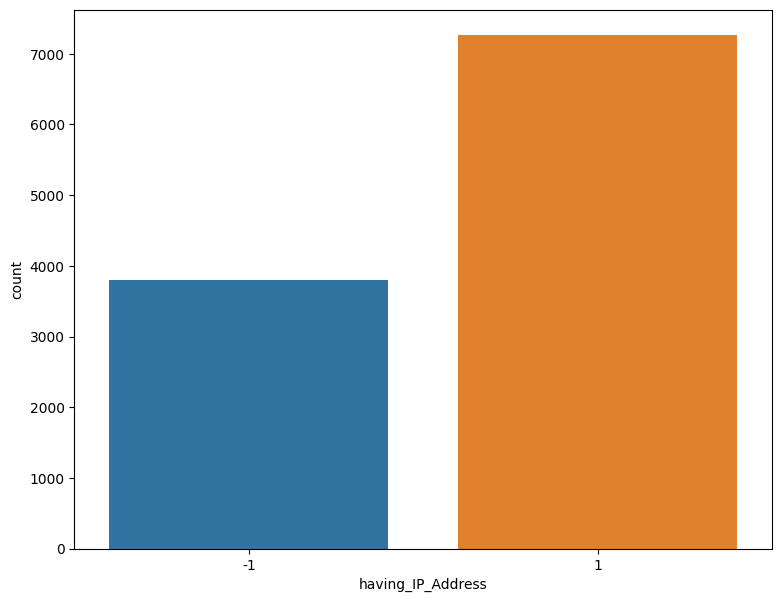

In [96]:
plt.figure(figsize=(9,7))
sns.countplot(x='having_IP_Address',data=df)
plt.show()

**The above counterplot having feature 'having_IP_Address' shows that urls having ip address generallly tend to be legit**

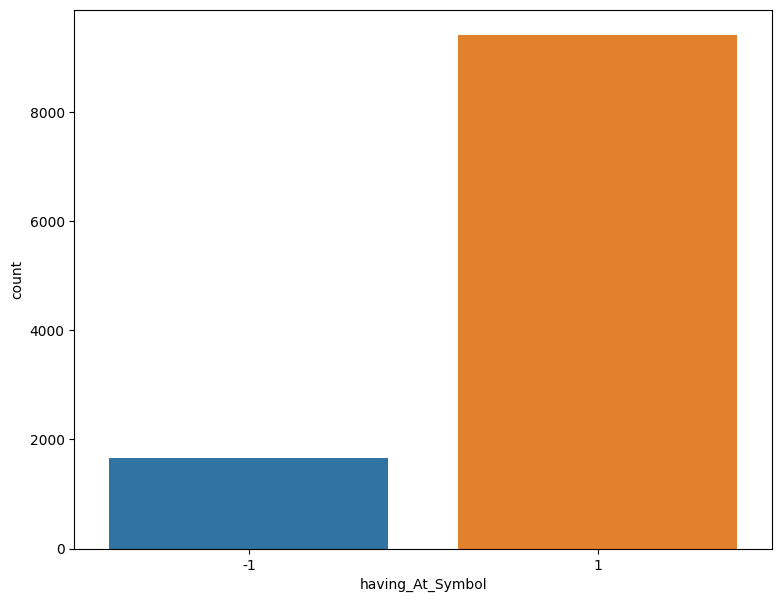

In [97]:
plt.figure(figsize=(9,7))
sns.countplot(x='having_At_Symbol',data=df)
plt.show()

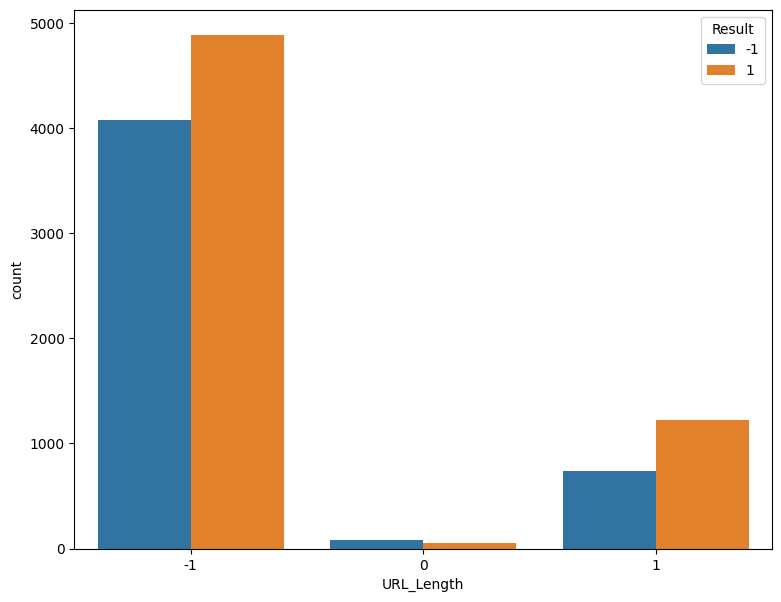

In [98]:
plt.figure(figsize=(9,7))
sns.countplot(x='URL_Length', hue='Result',data=df)
plt.show() #distribution based on features that can be considered as key predictors.

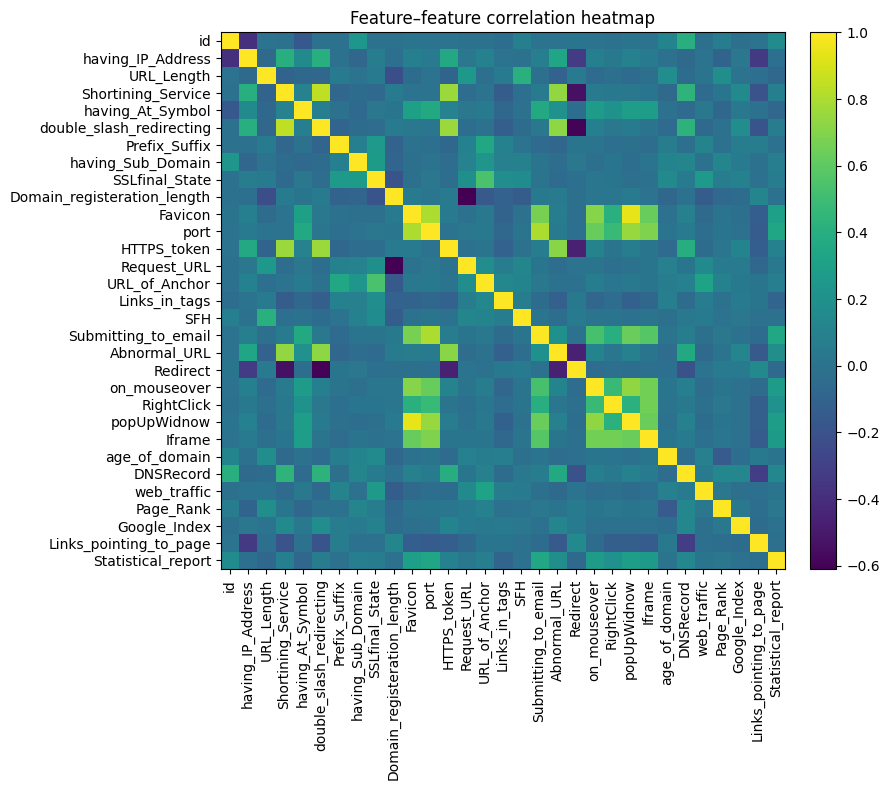

In [99]:
features_only = df.drop(columns=["Result"])
C = features_only.corr(numeric_only=True).values
labels = features_only.columns

plt.figure(figsize=(9,8))
plt.title("Feature–feature correlation heatmap")
im = plt.imshow(C, aspect="auto", interpolation="nearest")
plt.colorbar(im, fraction=0.046, pad=0.04)
plt.xticks(range(len(labels)), labels, rotation=90)
plt.yticks(range(len(labels)), labels)
plt.tight_layout()
plt.show()




In [100]:
correlation_matrix = df.corr()

# Step 4: Print the correlation table
print("Correlation Matrix:")
print(correlation_matrix)

# Optional: Display with better formatting (e.g., rounded to 2 decimals)
print("\nFormatted Correlation Matrix:")
print(correlation_matrix.round(2))

Correlation Matrix:
                                   id  having_IP_Address  URL_Length  \
id                           1.000000          -0.388317    0.006105   
having_IP_Address           -0.388317           1.000000   -0.052411   
URL_Length                   0.006105          -0.052411    1.000000   
Shortining_Service          -0.006281           0.403461   -0.097881   
having_At_Symbol            -0.169478           0.158699   -0.075108   
double_slash_redirecting    -0.003363           0.397389   -0.081247   
Prefix_Suffix               -0.007340          -0.005257    0.055247   
having_Sub_Domain            0.234091          -0.080745    0.003997   
SSLfinal_State              -0.006682           0.071414    0.048754   
Domain_registeration_length -0.001180          -0.022739   -0.221892   
Favicon                      0.007293           0.087025   -0.042497   
port                         0.001656           0.060979    0.000323   
HTTPS_token                  0.002916       

In [101]:

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
df = df.drop('id', axis=1) #negligible usage of this feature hence dropped.
# We are setting the map target as: -1 -> 0 (phishing), 1 -> 1 (legitimate)
df['Result'] = df['Result'].map({-1: 0, 1: 1})

# Based on heatmap, I have dropped some highly correlated and redundant features to improve model efficiency

redundant_features = ['on_mouseover', 'RightClick', 'Iframe', 
                      'double_slash_redirecting', 'Favicon', 'HTTPS_token']
df = df.drop(redundant_features, axis=1)
# Setting the target along with the features
X = df.drop('Result', axis=1)
y = df['Result']
# Doing a Train-Test Split (80/20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

rf = RandomForestClassifier(n_estimators=200, max_depth=10, random_state=0, n_jobs=-1)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

#Cross Validition set up
cv_scores = cross_val_score(rf, X, y, cv=5, scoring='accuracy')
print(f'Cross-Validation Accuracy: {cv_scores.mean() * 100:.2f}% (+/- {cv_scores.std() * 100:.2f}%)')

Accuracy: 96.07%
Cross-Validation Accuracy: 95.09% (+/- 0.81%)


In [102]:
from sklearn.metrics import roc_auc_score

roc_auc = roc_auc_score(y_test,y_pred)
print("ROC–AUC score:", roc_auc)

ROC–AUC score: 0.9584210613571179
